<h1 align="center">Credit Score Prediction</h1>

<h3>Features</h3>
<ul>
  <li><strong>ID:</strong> Represents a unique identification of an entry</li>
  <li><strong>Customer_ID:</strong> Represents a unique identification of a person</li>
  <li><strong>Month:</strong> Represents the month of the year</li>
  <li><strong>Name:</strong> Represents the name of a person</li>
  <li><strong>Age:</strong> Represents the age of the person</li>
  <li><strong>SSN:</strong> Represents the social security number of a person</li>
  <li><strong>Occupation:</strong></strong> Represents the occupation of the person</li>
  <li><strong>Annual Income:</strong> Represents the annual income of the person</li>
  <li><strong>Monthly Inhand Salary:</strong> Represents the monthly base salary of a person</li>
  <li><strong>Num Bank Accounts:</strong> Represents the number of bank accounts a person holds</li>
  <li><strong>Num Credit Card:</strong> Represents the number of other credit cards held by a person</li>
  <li><strong>Interest_Rate:</strong> Represents the interest rate on credit card</li>
  <li><strong>Num of Loan:</strong> Represents the number of loans taken from the bank</li>
  <li><strong>Type of Loan:</strong> Represents the types of loan taken by a person</li>
  <li><strong>Delay from due date:</strong> Represents the average number of days delayed from the payment date</li>
  <li><strong>Num of Delayed Payment:</strong> Represents the average number of payments delayed by a person</li>
  <li><strong>Changed Credit Limit:</strong> Represents the percentage change in credit card limit</li>
  <li><strong>Num Credit Inquiries:</strong> Represents the number of credit card inquiries</li>
  <li><strong>Credit Mix:</strong> Represents the classification of the mix of credits</li>
  <li><strong>Outstanding Debt:</strong> Represents the remaining debt to be paid (in USD)</li>
  <li><strong>Credit Utilization Ratio:</strong> Represents the utilization ratio of credit card</li>
  <li><strong>Credit History Age:</strong> Represents the age of credit history of the person</li>
  <li><strong>Payment of Min Amount:</strong> Represents whether only the minimum amount was paid by the person</li>
  <li><strong>Total EMI per month:</strong> Represents the monthly EMI payments (in USD)</li>
  <li><strong>Amount invested monthly:</strong> Represents the monthly amount invested by the customer (in USD)</li>
  <li><strong>Payment Behaviour:</strong> Represents the payment behavior of the customer (in USD)</li>
  <li><strong>Monthly_Balance:</strong> Represents the monthly balance amount of the customer (in USD)</li>
  <li><strong>Credit Score:</strong> Represents the bracket of credit score (Poor, Standard, Good)</li>
</ul> 

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.feature_selection import SelectKBest, RFE, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, label_binarize
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    roc_curve,
    auc,
    confusion_matrix
)
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier, StackingClassifier

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)


In [363]:
data = pd.read_csv("train.csv")
data = data.head(1000)
data.shape

(1000, 28)

In [364]:
dict = {"January" : 1,"February" : 2,"March" : 3,"April" : 4,"May" : 5,"June" : 6,"July" : 7,"August" : 8}
data["Month"] = data["Month"].map(dict)
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [365]:
data.isnull().sum()

ID                            0
Customer_ID                   0
Month                         0
Name                         98
Age                           0
SSN                           0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary       155
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                168
Delay_from_due_date           0
Num_of_Delayed_Payment       76
Changed_Credit_Limit          0
Num_Credit_Inquiries         25
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age           95
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly      46
Payment_Behaviour             0
Monthly_Balance              17
Credit_Score                  0
dtype: int64

In [366]:
data.describe()

,Month,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,1000.000000,845.000000,1000.000000,1000.000000,1000.000000,1000.000000,975.000000,1000.000000,1000.000000
mean,4.500000,4462.535093,10.935000,26.783000,83.111000,21.693000,13.694359,32.170609,1472.216076
std,2.292434,3123.601366,79.197911,147.942668,510.892781,16.364857,104.269656,5.142146,7972.497257
min,1.000000,519.128750,0.000000,1.000000,1.000000,-2.000000,0.000000,21.744884,0.000000
25%,2.750000,1828.240000,3.000000,4.000000,7.000000,9.000000,2.000000,27.979514,29.045533
50%,4.500000,3260.465000,6.000000,5.000000,14.000000,17.000000,4.000000,32.163236,69.685459
75%,6.250000,6300.581667,8.000000,7.000000,20.000000,28.000000,9.000000,36.486123,185.631542
max,8.000000,12432.610000,1488.000000,1385.000000,5565.000000,67.000000,1936.000000,46.194238,81441.000000


In [367]:
columns_with_underscore = [col for col in data.columns if any("_" in str(value) for value in data[col])]
columns_with_underscore

['Customer_ID',
 'Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Payment_Behaviour']

<h3>Data Cleaning</h3>

In [368]:
def remove_underscore(col):
    data[col] = data[col].apply(lambda x: str(x).replace("_", "") if str(x) else x)
    data[col] = pd.to_numeric(data[col], errors="coerce")


data["Num_of_Loan"].fillna("-100")
data["Num_of_Delayed_Payment"].fillna("-1")



remove_underscore("Age")
remove_underscore("Num_of_Delayed_Payment")
remove_underscore("Changed_Credit_Limit")
remove_underscore("Outstanding_Debt")
remove_underscore("Amount_invested_monthly")
remove_underscore("Monthly_Balance")

In [369]:
dict = {
    'High_spent_Small_value_payments' : 0,
    'Low_spent_Large_value_payments' : 1,
    'Low_spent_Medium_value_payments' : 2,
    'Low_spent_Small_value_payments' : 3,
    'High_spent_Medium_value_payments' : 4, 
    'High_spent_Large_value_payments': 5,
    '!@9#%8' : np.nan
}

data['Payment_Behaviour'] = data['Payment_Behaviour'].map(dict)

<h3>Finding mean, mode and filling the missing values for a person</h3>

In [370]:
def find_mean(i, col):
    mean = 0
    j = i
    while j != i + 8:
        value = data.at[j, col]
        if pd.notna(value) and (np.issubdtype(type(value), np.floating)or np.issubdtype(type(value), np.integer)):
            mean += float(value)
        j += 1
    return mean / 8


def find_mode(i, col):
    mode = {}
    j = i

    while j != i + 8:
        value = data.at[j, col]
        if pd.notna(value) and (np.issubdtype(type(value), np.floating) or (np.issubdtype(type(value), np.integer) and value > 0)):
            if data.at[j, col] in mode:
                mode[value] += 1
            else:
                mode[value] = 1
        j += 1

    return max(mode, key=mode.get)

def date_to_int(value):
    year = []
    month = []
    i = 0
    flag = 0

    for char in value:
        if char.isnumeric() and not flag:
            year.append(char)
        else:
            flag = 1
        
        if char.isnumeric() and flag:
            month.append(char)

    result = result = int(''.join(map(str, year))) * 12 +  int(''.join(map(str, month)))

    return result


In [371]:
def fill_missing(i,col,condition):
     index = []
     j = i
     valid = ''
     while (j != i + 8):
         if condition(j,col):
             index.append(j)
         else:
             valid = data.at[j,col]
         j+=1
     for k in index:
         data.at[k,col] = valid

def fill_with_mean(i,col,condition):
    mean = find_mean(i,col)
    j = i
    while (j != i + 8):
         if condition(j,col):
            data.at[j,col] = mean
         j+=1

def fill_with_mode(i,col,condition):
        mode = find_mode(i,col)
        j = i
        while (j != i + 8):
             if condition(j,col):
                data.at[j,col] = mode
             j+=1

def transform_dates(i):
    j = i
    while(j != i + 8):
        data.at[j, "Credit_History_Age"] = date_to_int(data.at[j, "Credit_History_Age"])
        j += 1

In [372]:
def find_missing():
    for i, _ in data.iterrows():
        if i % 8 == 0:
            fill_missing(i, "Name", lambda j, col: pd.isna(data.at[j, col]))
            fill_missing(i, "Occupation", lambda j, col: "__" in data.at[j, col])
            fill_missing(i, "Credit_Mix", lambda j, col: "_" in data.at[j, col])
            fill_missing(i, "Annual_Income", lambda j, col: "_" in data.at[j, col])
            fill_missing(i, "Type_of_Loan", lambda j, col: pd.isna(data.at[j, col]))
            fill_missing(i, "Num_of_Loan", lambda j, col: "-" in data.at[j, col])
            fill_missing(i, "SSN", lambda j, col: "#" in data.at[j, col])
            fill_missing(i, "Credit_History_Age", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Changed_Credit_Limit", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Monthly_Inhand_Salary", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Delay_from_due_date", lambda j, col: data.at[j, col] < 0)
            fill_with_mean(i, "Num_of_Delayed_Payment", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Num_of_Delayed_Payment", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Amount_invested_monthly", lambda j, col: data.at[j, col] == 10_000 or pd.isna(data.at[j,col]))
            fill_with_mean(i, "Monthly_Balance", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i,"Num_Credit_Inquiries",lambda j, col: pd.isna(data.at[j, col]),)
            fill_with_mean(i, "Payment_Behaviour", lambda  j, col: pd.isna(data.at[j, col]))
            fill_with_mode(i, "Age", lambda j, col: "-" in str(data.at[j, col]))
            transform_dates(i)


find_missing()

In [373]:
remove_underscore("Num_of_Loan")
remove_underscore("Annual_Income")

In [374]:
columns_with_underscore = [col for col in data.columns if any("_" in str(value) for value in data[col])]
columns_with_underscore

['Customer_ID', 'Occupation']

In [375]:
label_encoder = LabelEncoder()

data["Occupation"] = label_encoder.fit_transform(data["Occupation"])
data["Credit_Mix"] = label_encoder.fit_transform(data["Credit_Mix"])
data["Payment_of_Min_Amount"] = label_encoder.fit_transform(data["Payment_of_Min_Amount"])
data["Credit_Score"]=data["Credit_Score"].map({"Standard":0,"Good":1,"Poor":2})


data.drop("ID", axis=1, inplace=True)
data.drop("Name", axis=1, inplace=True)
data.drop("Customer_ID", axis=1, inplace=True)
data.drop("SSN", axis=1, inplace=True)
data.drop("Type_of_Loan", axis=1, inplace=True)

In [376]:
data.shape

(1000, 23)

In [377]:
data.head(8)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,12,19114.12,1824.843333,3,4,3,4,3,7.0,11.27000,4.0,1,809.98,26.822620,265,1,49.574949,80.415295,0.000,312.494089,1
1,2,23,12,19114.12,912.421667,3,4,3,4,3,4.5,11.27000,4.0,1,809.98,31.944960,271,1,49.574949,118.280222,1.000,284.629162,1
2,3,23,12,19114.12,912.421667,3,4,3,4,3,7.0,8.98625,4.0,1,809.98,28.609352,267,1,49.574949,81.699521,2.000,331.209863,1
3,4,23,12,19114.12,912.421667,3,4,3,4,5,4.0,6.27000,4.0,1,809.98,31.377862,268,1,49.574949,199.458074,3.000,223.451310,1
4,5,23,12,19114.12,1824.843333,3,4,3,4,6,4.5,11.27000,4.0,1,809.98,24.797347,269,1,49.574949,41.420153,4.000,341.489231,1
5,6,23,12,19114.12,912.421667,3,4,3,4,8,4.0,9.27000,4.0,1,809.98,27.262259,270,1,49.574949,62.430172,2.125,340.479212,1
6,7,23,12,19114.12,1824.843333,3,4,3,4,3,8.0,11.27000,4.0,1,809.98,22.537593,271,1,49.574949,178.344067,3.000,244.565317,1
7,8,23,12,19114.12,1824.843333,3,4,3,4,3,6.0,11.27000,4.0,1,809.98,23.933795,271,1,49.574949,24.785217,4.000,358.124168,0


In [378]:
data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.500000,99.596000,7.288000,1.795283e+05,4258.233230,10.935000,26.783000,83.111000,5.904000,21.710000,26.565500,10.316104,13.853500,1.184000,1494.994240,32.170609,1.412000,1472.216076,278.050432,2.737750,406.485493,0.731000
std,2.292434,590.103368,4.250073,1.438891e+06,3059.616321,79.197911,147.942668,510.892781,55.364682,16.342367,183.294373,6.633076,103.626018,0.823907,1216.924999,5.142146,0.684635,7972.497257,380.566153,1.505383,217.935407,0.844602
min,1.000000,14.000000,0.000000,8.701545e+03,389.346562,0.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-4.260000,0.000000,0.000000,35.540000,21.744884,0.000000,0.000000,0.000000,0.000000,7.129357,0.000000
25%,2.750000,22.000000,4.000000,2.018602e+04,1740.539167,3.000000,4.000000,7.000000,1.000000,9.000000,8.000000,5.510000,2.000000,0.000000,585.050000,27.979514,1.000000,29.045533,81.719606,2.000000,268.213761,0.000000
50%,4.500000,32.000000,7.000000,4.134558e+04,3047.676667,6.000000,5.000000,14.000000,3.000000,17.000000,14.000000,9.215000,4.000000,1.000000,1154.460000,32.163236,2.000000,69.685459,149.396556,3.000000,348.523430,0.000000
75%,6.250000,40.000000,11.000000,7.392846e+04,5981.026250,8.000000,7.000000,20.000000,5.000000,28.000000,19.000000,14.780000,9.000000,2.000000,2174.160000,36.486123,2.000000,185.631542,286.674222,4.000000,470.464294,2.000000
max,8.000000,7580.000000,14.000000,2.233578e+07,12432.610000,1488.000000,1385.000000,5565.000000,1464.000000,67.000000,3318.000000,32.640000,1936.000000,2.000000,4984.820000,46.194238,2.000000,81441.000000,2772.302518,5.000000,1184.899694,2.000000


<AxesSubplot:ylabel='Credit_Score'>

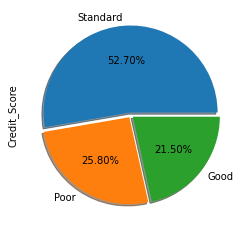

In [379]:
data["Credit_Score"].value_counts().plot.pie(explode = [0.03,0.03,0.03], autopct="%1.2f%%",shadow = True,labels = ["Standard","Poor","Good"])

<h3>Correlation map without removing outliers</h3>

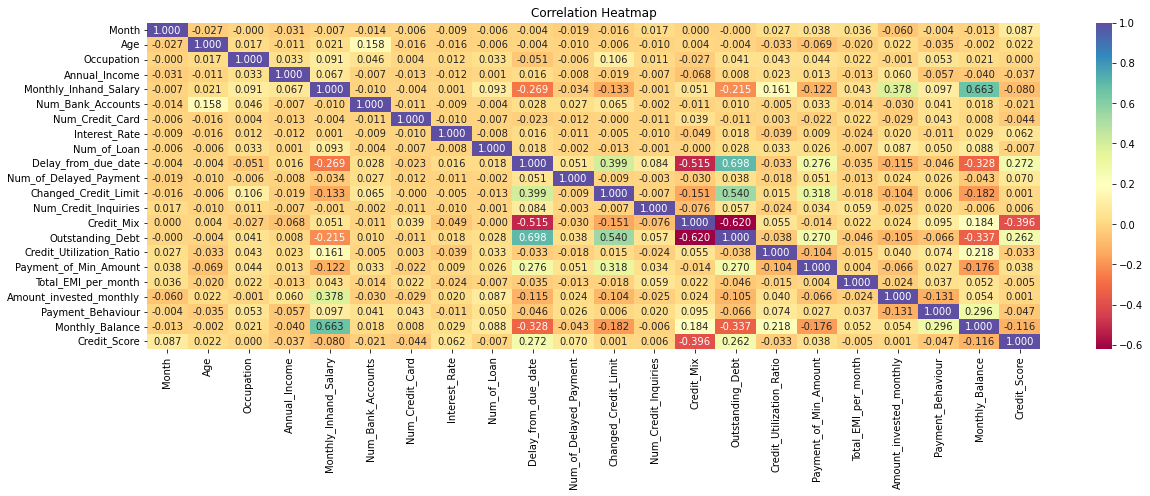

In [380]:
def show_heat_map(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="Spectral",
        fmt=".3f",
    )
    plt.title("Correlation Heatmap")


show_heat_map(data)

<h3>Visualizing the Outliers</h3>

In [381]:
def show_outliers(data, col, edge):
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    sns.stripplot(y=col, data=data[data[col] < edge], ax=axs[0])
    axs[0].set_title(f"{col} < {edge}")
    sns.stripplot(y=col, data=data[data[col] > edge], ax=axs[1])
    axs[1].set_title(f"{col} > {edge}")
    plt.tight_layout()
    plt.show()

In [382]:
def outlier_one(data):
    show_outliers(data,"Age", 56)
    show_outliers(data,"Num_Bank_Accounts", 11)
    show_outliers(data,"Num_Credit_Card", 15)
    show_outliers(data,"Interest_Rate", 35)

In [383]:
def outlier_two(data):
    show_outliers(data,"Num_of_Loan", 10)
    show_outliers(data,"Num_of_Delayed_Payment", 30)
    show_outliers(data,"Num_Credit_Inquiries",27)
    show_outliers(data,"Monthly_Balance",1e-10)

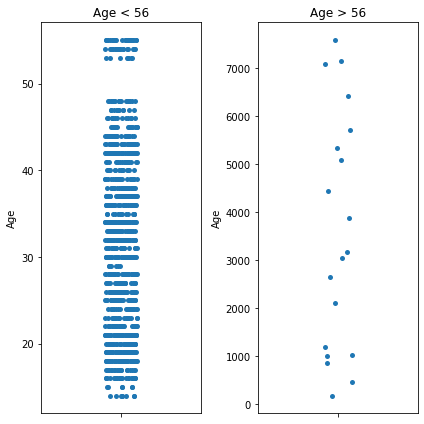

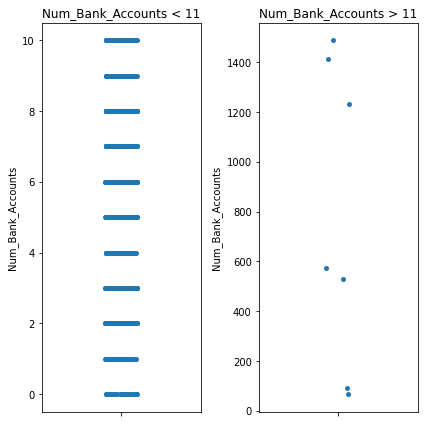

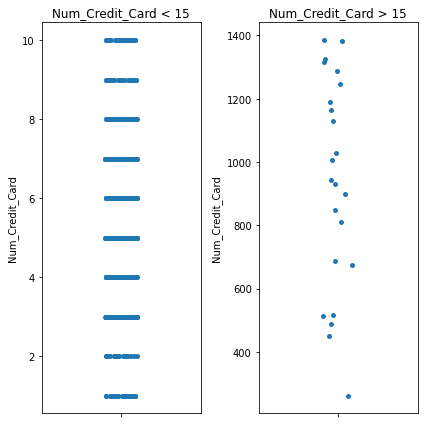

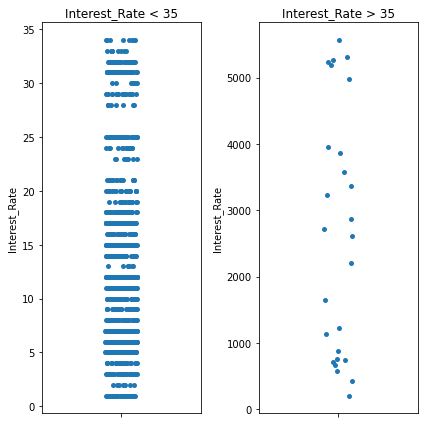

In [384]:
outlier_one(data)

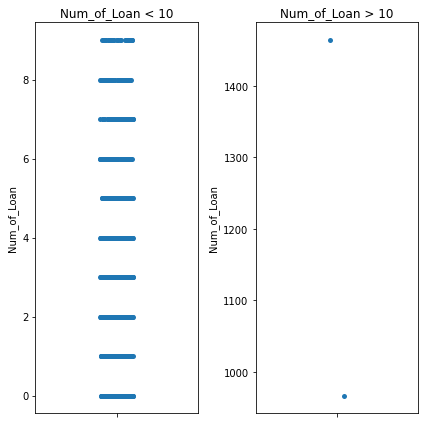

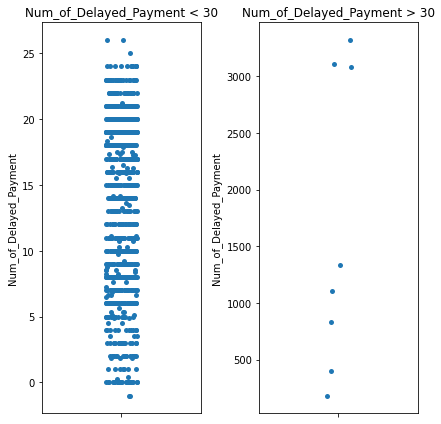

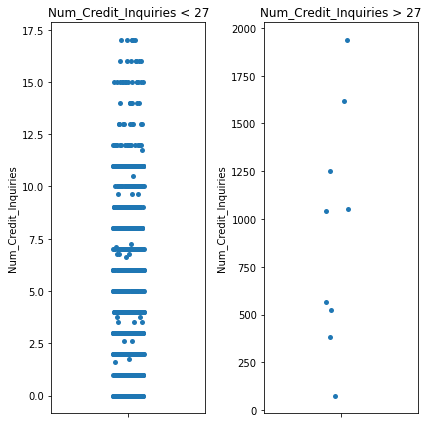

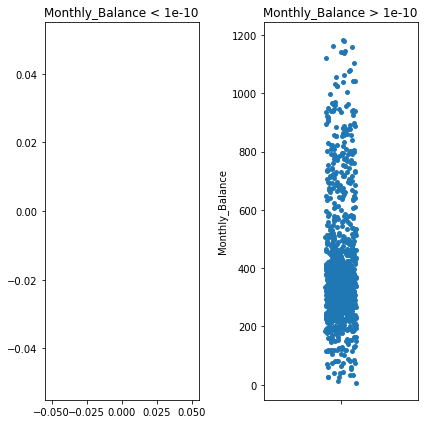

In [385]:
outlier_two(data)

<h3>Removing the outliers with IQR</h3>

In [386]:
new_data = data.copy()

cols = [
    "Age",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Num_of_Delayed_Payment",
    "Num_Credit_Inquiries",
    "Monthly_Balance",
]

for col in cols:
    q1, q3 = np.percentile(new_data[col], [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers_mask = (new_data[col] < lower_bound) | (new_data[col] > upper_bound)
    new_data = new_data[~outliers_mask]

new_data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,821.000000,821.000000,821.000000,8.210000e+02,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,4.515225,31.803898,7.287454,2.002615e+05,3704.486426,5.833130,5.604141,15.103532,3.752741,22.749086,13.902406,10.613182,5.798417,1.169306,1557.040414,31.847735,1.444580,1429.527817,270.105073,2.614951,350.362171,0.732034
std,2.277424,10.472928,4.251852,1.587307e+06,2639.230597,2.596465,1.972477,9.150650,2.531462,16.738968,6.217781,6.850287,4.061271,0.853591,1257.484151,4.969039,0.692053,7879.642660,371.296751,1.449090,143.441948,0.870273
min,1.000000,14.000000,0.000000,8.701545e+03,389.346562,0.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-4.260000,0.000000,0.000000,35.540000,21.744884,0.000000,0.000000,0.000000,0.000000,7.129357,0.000000
25%,3.000000,22.000000,4.000000,1.979552e+04,1683.101667,4.000000,5.000000,7.000000,2.000000,10.000000,9.000000,5.520000,2.000000,0.000000,585.050000,27.698524,1.000000,31.379794,77.875344,2.000000,260.080975,0.000000
50%,4.000000,32.000000,7.000000,3.484784e+04,2853.309167,6.000000,5.000000,14.000000,4.000000,19.000000,15.000000,9.300000,5.000000,1.000000,1194.280000,31.828536,2.000000,69.685459,141.187910,3.000000,333.291982,0.000000
75%,7.000000,39.000000,11.000000,6.353698e+04,5163.177500,8.000000,7.000000,20.000000,6.000000,30.000000,19.000000,15.270000,9.000000,2.000000,2258.730000,36.012794,2.000000,171.823067,274.572674,4.000000,417.836369,2.000000
max,8.000000,55.000000,14.000000,2.233578e+07,12432.610000,10.000000,10.000000,34.000000,9.000000,67.000000,26.000000,32.640000,17.000000,2.000000,4984.820000,42.769864,2.000000,81441.000000,2772.302518,5.000000,760.364955,2.000000


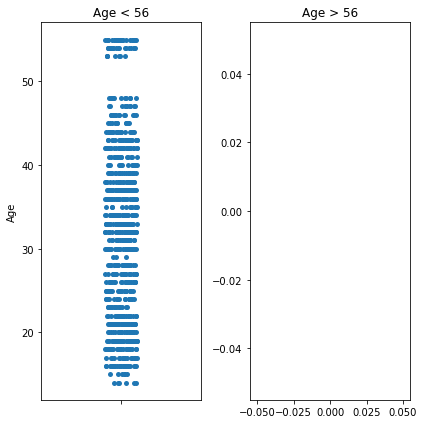

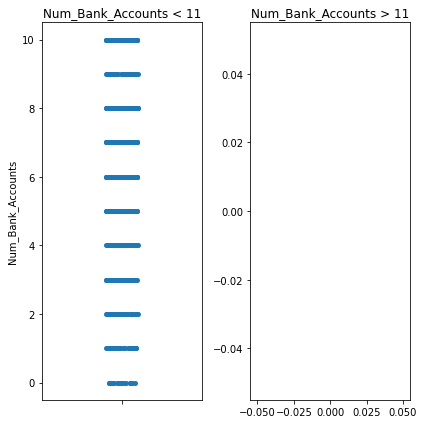

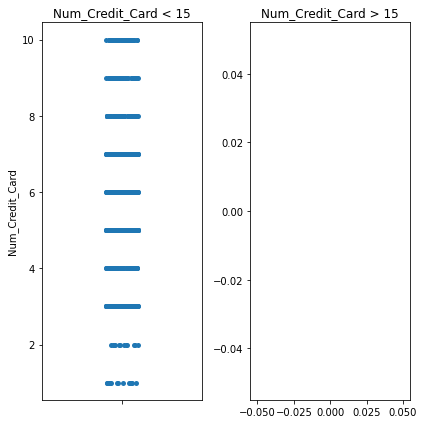

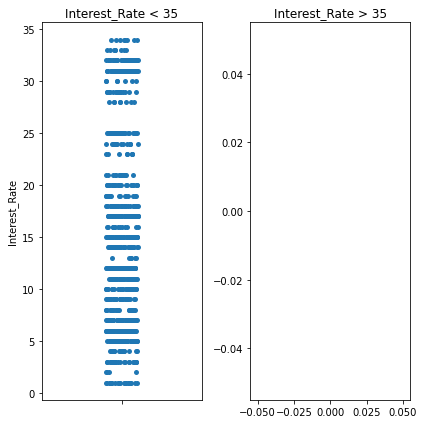

In [387]:
outlier_one(new_data)

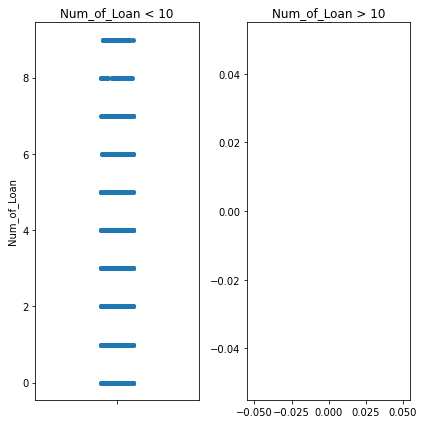

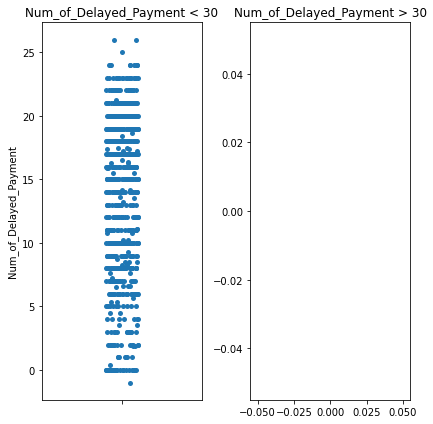

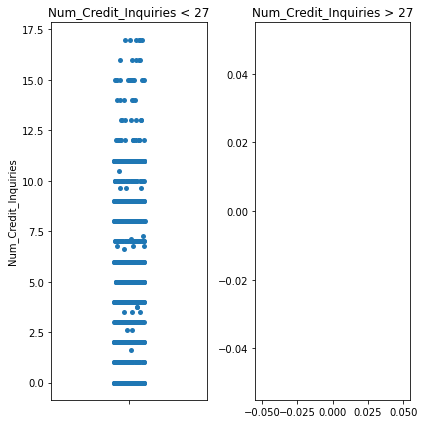

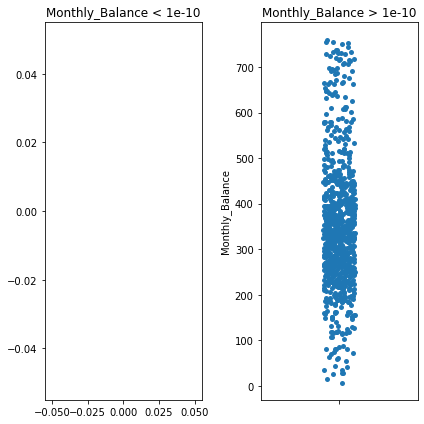

In [388]:
outlier_two(new_data)

<h4>Correlation map after removing outliers</h4>

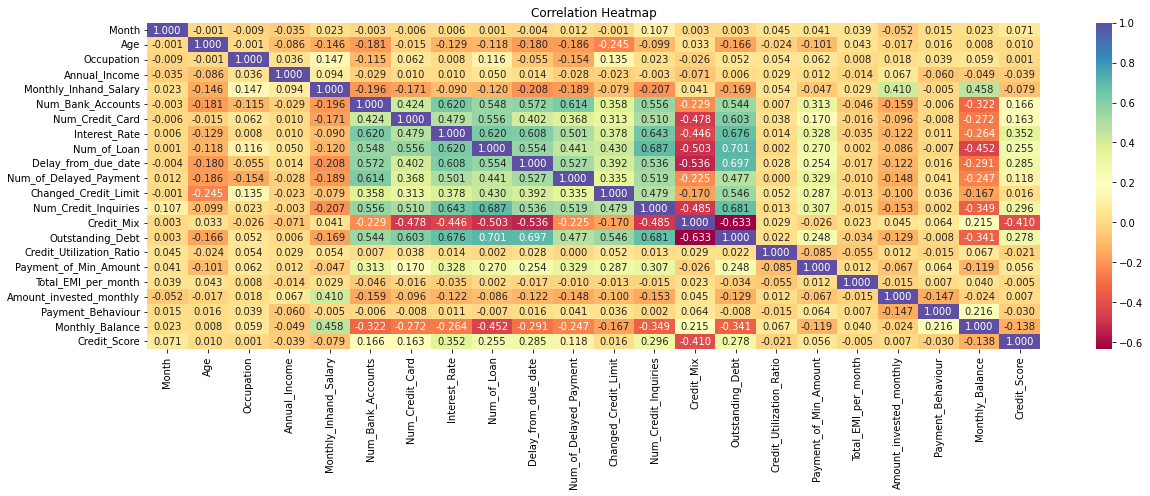

In [389]:
show_heat_map(new_data)

<h3>Balancing the data with oversampling</h3>

In [390]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()

y = new_data["Credit_Score"]
X = new_data.drop("Credit_Score", axis=1)
X, y = sampler.fit_resample(X, y)

new_data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

<AxesSubplot:ylabel='Credit_Score'>

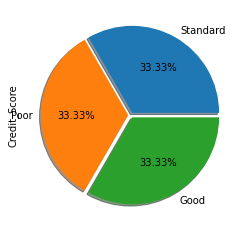

In [391]:
new_data["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Poor", "Good"],
)

In [392]:
new_data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,1350.000000,1350.000000,1350.000000,1.350000e+03,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,4.604444,31.945926,7.525926,2.202459e+05,3960.216219,5.426667,5.488889,14.598519,3.562222,21.445185,12.872685,9.954365,5.519537,1.080000,1487.755281,31.881147,1.374074,1421.242316,289.703108,2.602870,359.680554,1.000000
std,2.251229,10.273396,4.092572,1.621030e+06,2786.632308,2.747900,1.965856,9.384481,2.501930,16.877473,6.802934,6.696685,4.059441,0.801851,1210.677004,4.996975,0.681261,7510.465787,382.143187,1.426993,151.469299,0.816799
min,1.000000,14.000000,0.000000,8.701545e+03,389.346562,0.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-4.260000,0.000000,0.000000,35.540000,21.744884,0.000000,0.000000,0.000000,0.000000,7.129357,0.000000
25%,3.000000,23.000000,4.000000,1.979552e+04,1684.168333,3.000000,4.000000,7.000000,2.000000,9.000000,7.000000,5.270000,2.000000,0.000000,565.220000,27.912838,1.000000,31.379794,82.579802,2.000000,263.710974,0.000000
50%,5.000000,32.000000,7.000000,3.980012e+04,3037.986667,6.000000,5.000000,12.000000,3.000000,16.000000,14.000000,8.890000,5.000000,1.000000,1113.060000,31.614310,1.000000,69.685459,153.493168,3.000000,339.622632,1.000000
75%,7.000000,39.000000,11.000000,7.233098e+04,5799.450000,8.000000,7.000000,20.000000,5.000000,28.000000,19.000000,13.920000,9.000000,2.000000,2226.370000,36.096633,2.000000,185.111983,315.651527,4.000000,436.119318,2.000000
max,8.000000,55.000000,14.000000,2.233578e+07,12432.610000,10.000000,10.000000,34.000000,9.000000,67.000000,26.000000,32.640000,17.000000,2.000000,4984.820000,42.769864,2.000000,81441.000000,2772.302518,5.000000,760.364955,2.000000


<h4>Correlation map after balancing the data</h4>

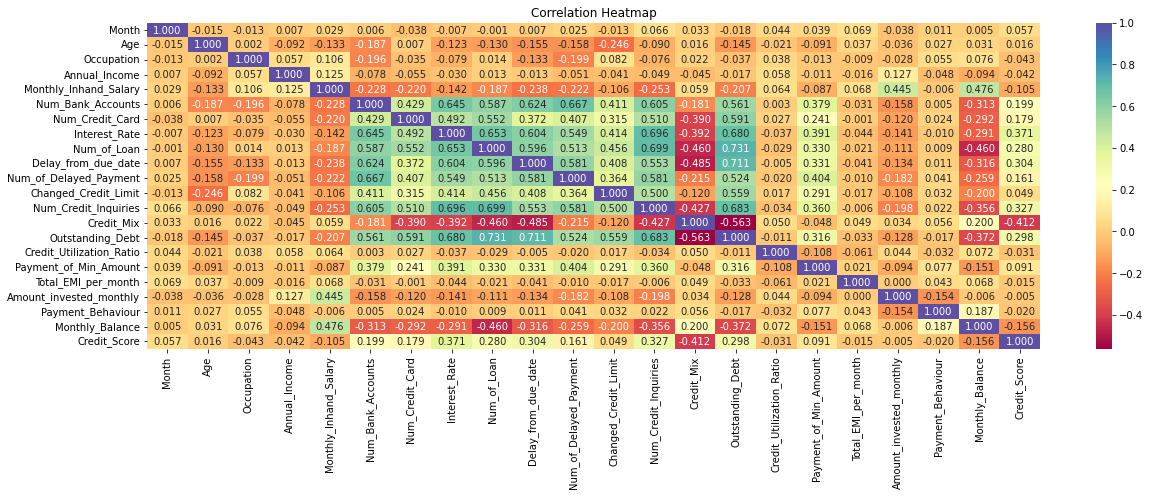

In [393]:
show_heat_map(new_data)

<h3>Feature Selection and Machine Learning Algorithms</h3>

<div>
  <div>Feature Selection Algorithms</div>
  <ul>
    <li>Lasso</li>
    <li>chi2</li>
    <li>MIC</li>
    <li>Ridge</li>
    <li>RFE</li>
    <li>PCA</li>
  </ul>
</div>


<div>
  <div>Machine Learning Algorithms</div>
  <ul>
    <li>Random Forest</li>
    <li>Decision Tree</li>
    <li>Gradient Boosting</li>
  </ul>
</div>


In [394]:
result_list = {"Lasso" : [], "chi2" : [],"MIC" : [],"Ridge" : [],"RFE" : [],"PCA" : [], "MaxVoting" : [], "Stacking" : []}

def calculate(y_test, y_pred, y_proba, y_bin, method_name, num_of_features, model_name):

    dictionary = {        
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1" : f1_score(y_test, y_pred, average='weighted'),
        "recall" : recall_score(y_test, y_pred, average='weighted'), 
        "precision" :  precision_score(y_test, y_pred, average='weighted'),
        "roc_auc" : roc_auc_score(y_test, y_proba, multi_class="ovr"),
        "number_of_features" : num_of_features, 
        "model_name" : model_name,
        "confusion_matrix" :  confusion_matrix(y_test, y_pred),
        "roc_curve" : None
    }

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(y_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    dictionary["roc_curve"] = [fpr, tpr, roc_auc]
    result_list[method_name].append(dictionary)


<h3>Scaling Data</h3>

In [395]:
def min_max_scale(X):
    scaler = MinMaxScaler()
    X_min_max = pd.DataFrame(scaler.fit_transform(X))
    return X_min_max

def standard_scaler(X):
    scaler = StandardScaler()
    X_standard = pd.DataFrame(scaler.fit_transform(X))
    return X_standard

In [396]:
X = new_data.drop("Credit_Score", axis=1)
y = new_data["Credit_Score"]

X_standard = standard_scaler(X)
X_min_max = min_max_scale(X)

In [397]:
def fit_model(X_selected, y,method_name ,model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=[0,1,2])
    calculate(y_test, y_pred, y_proba, y_bin, method_name,X_selected.shape[1], model_name)

<h4>Lasso</h4>

In [398]:
def lasso(X,y):
    lasso = Lasso(alpha=0.042)
    lasso.fit(X, y)
    selected = X.columns[lasso.coef_ != 0]
    return X[selected]

In [399]:
X_selected = lasso(X_standard,y)

fit_model(X_selected,y,"Lasso",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
fit_model(X_selected,y,"Lasso",DecisionTreeClassifier(), "DecisionTreeClassifier")
fit_model(X_selected,y,"Lasso",GradientBoostingClassifier(), "GradientBoostingClassifier")

<h4>Chi2 and Mutual Info</h4>

In [400]:
def select_kbest(X, y, method, k):
    k_best = SelectKBest(score_func=method, k=k)
    selected = k_best.fit_transform(X, y)
    return selected

for i in range(15,X.shape[1]+1):
    fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
    fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",DecisionTreeClassifier(), "DecisionTreeClassifier")
    fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",GradientBoostingClassifier(), "GradientBoostingClassifier")
    fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
    fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",DecisionTreeClassifier(), "DecisionTreeClassifier")
    fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",GradientBoostingClassifier(), "GradientBoostingClassifier")

<h4>Ridge</h4>

In [401]:
def ridge(X, y, k):
    ridge = Ridge(alpha=1)
    ridge.fit(X, y)
    feature_importance = np.abs(ridge.coef_)
    selected_feature_indices = np.argsort(feature_importance)[::-1][:k]
    X_selected = X.iloc[:, selected_feature_indices]
    return X_selected

for i in range (15,X.shape[1]+1):
    fit_model(ridge(X_min_max,y,i), y,"Ridge",RandomForestClassifier(n_jobs=-1),"RandomForestClassifier")
    fit_model(ridge(X_min_max,y,i), y,"Ridge",DecisionTreeClassifier(),"DecisionTreeClassifier")
    fit_model(ridge(X_min_max,y,i), y,"Ridge",GradientBoostingClassifier(),"GradientBoostingClassifier")


<h4>RFE</h4>

In [402]:
def RFE_feature_selection(X, y, model, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    rfe = RFE(model,n_features_to_select=k)
    rfe.fit(X_train, y_train)
    selected_features = rfe.support_
    selected_columns = X_train.columns[selected_features]
    return  X_train[selected_columns], X_test[selected_columns], y_train,y_test


def RFE_predict(X,y,model,model_name,k):
    X_train, X_test, y_train, y_test = RFE_feature_selection(X,y,model,k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=[0,1,2])
    calculate(y_test,y_pred,y_proba,y_bin,"RFE",X_train.shape[1],model_name)

for i in range (15,X.shape[1]+1):
    RFE_predict(X,y,RandomForestClassifier(n_jobs=-1),"RandomForestClassifier",i)
    RFE_predict(X,y,DecisionTreeClassifier(),"DecisionTreeClassifier",i)
    RFE_predict(X,y,GradientBoostingClassifier(),"GradientBoostingClassifier",i)

<h4>PCA</h4>

In [403]:
def PCA_feature_selection(X, k):
    pca = PCA(n_components = k)
    pca.fit(X)
    data = pca.transform(X)
    return data

for i in range(15,X.shape[1]+1):
    fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",RandomForestClassifier(n_jobs=-1),"RandomForestClassifier")
    fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",DecisionTreeClassifier(),"DecisionTreeClassifier")
    fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",GradientBoostingClassifier(),"GradientBoostingClassifier")

In [404]:
models_data = []

for model_name, model_data in result_list.items():
    for j in range(len(model_data)): 
        model_item = model_data[j]
        model_entry = {
            'method_name' : model_name,
            'model_name': model_item["model_name"],
            'accuracy': model_item["accuracy"],
            'f1': model_item["f1"],
            'recall': model_item["recall"],
            'precision': model_item["precision"],
            'roc_auc' : model_item["roc_auc"],
            'number_of_features': model_item["number_of_features"],
            'confusion_matrix' : model_item["confusion_matrix"],
            "roc_curve" : model_item["roc_curve"]
        }
        models_data.append(model_entry)

score_dataframe = pd.DataFrame(models_data)
best_method = score_dataframe[score_dataframe["accuracy"] == score_dataframe["accuracy"].max()]

In [405]:
score_dataframe.drop(["confusion_matrix", "roc_curve"], axis=1)

,method_name,model_name,accuracy,f1,recall,precision,roc_auc,number_of_features
0,Lasso,RandomForestClassifier,0.940741,0.940190,0.940741,0.941111,0.983418,6
1,Lasso,DecisionTreeClassifier,0.911111,0.908914,0.911111,0.911216,0.930098,6
2,Lasso,GradientBoostingClassifier,0.888889,0.886756,0.888889,0.890947,0.958724,6
3,chi2,RandomForestClassifier,0.900000,0.897390,0.900000,0.901451,0.974505,15
4,chi2,DecisionTreeClassifier,0.907407,0.904035,0.907407,0.908133,0.924064,15
...,...,...,...,...,...,...,...,...
118,PCA,DecisionTreeClassifier,0.862963,0.859573,0.862963,0.864033,0.900994,21
119,PCA,GradientBoostingClassifier,0.874074,0.868824,0.874074,0.883593,0.955682,21
120,PCA,RandomForestClassifier,0.896296,0.893230,0.896296,0.902303,0.982714,22
121,PCA,DecisionTreeClassifier,0.859259,0.856674,0.859259,0.856843,0.893118,22


In [406]:
best_method.drop(["confusion_matrix", "roc_curve"], axis=1)

,method_name,model_name,accuracy,f1,recall,precision,roc_auc,number_of_features
0,Lasso,RandomForestClassifier,0.940741,0.94019,0.940741,0.941111,0.983418,6


In [407]:
method_name = best_method["method_name"].to_string().split(" ")[-1]
number_of_features = int(best_method["number_of_features"].to_string().split(" ")[-1])

In [408]:
call_best_method = {
    "Lasso": lambda _, X=X_standard, y=y: lasso(X, y),
    "chi2": lambda k, X=X_min_max, y=y: select_kbest(X, y, chi2, k),
    "MIC": lambda k, X=X_min_max, y=y: select_kbest(X, y, mutual_info_classif, k),
    "Ridge": lambda k, X=X_min_max, y=y: ridge(X, y, k),
    "RFE": lambda k, X=X, y=y: RFE_feature_selection(X, y, DecisionTreeClassifier(), k),
    "PCA": lambda k, X=X_min_max, y=y: PCA_feature_selection(X, k),
}

X_selected_features = call_best_method[method_name](number_of_features)

In [409]:
if type(X_selected_features) == tuple:
    X_train, X_test, y_train, y_test = X_selected_features
else:
    X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size= 0.2, random_state=42)


<h4>Models for max voting and stacking</h4>

In [410]:
models = [
    ("RandomForestClassifier", RandomForestClassifier(n_jobs=-1, n_estimators=100)),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier(n_jobs=-1, n_neighbors=1)),
    ("ExtraTreeClassifier", ExtraTreeClassifier()),
]

<h4>Max Voting</h4>

In [411]:
def max_voting():
    max_voting_model = VotingClassifier(models, voting='soft', n_jobs=-1)
    max_voting_model.fit(X_train, y_train)
    prediction = max_voting_model.predict(X_test)
    y_proba = max_voting_model.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=[0,1,2])

    calculate(y_test, prediction, y_proba,y_bin,  "MaxVoting", number_of_features, "MaxVoting")

max_voting()

<h4>Stacking</h4>

In [412]:
def stacking():
    stacked = StackingClassifier(estimators=models, final_estimator=RandomForestClassifier(n_estimators=150), n_jobs=-1)
    stacked.fit(X_train, y_train)
    predictions = stacked.predict(X_test)
    y_proba = stacked.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=[0,1,2])

    calculate(y_test, predictions, y_proba, y_bin, "Stacking", number_of_features, "Stacking")

stacking()

In [413]:
def add_to_dataframe(model, dataframe):
    models_data = []

    for j in range(len(result_list[model])): 
        model_item = result_list[model][j]
        model_entry = {
            'method_name' : model,
            'model_name': model_item["model_name"],
            'accuracy': model_item["accuracy"],
            'f1': model_item["f1"],
            'recall': model_item["recall"],
            'precision': model_item["precision"],
            'roc_auc' : model_item["roc_auc"],
            'number_of_features': model_item["number_of_features"],
            "confusion_matrix" : model_item["confusion_matrix"],
            "roc_curve" : model_item["roc_curve"]
        }
        models_data.append(model_entry)

    temp_df =  pd.DataFrame(models_data)
    dataframe = pd.concat([dataframe, temp_df], ignore_index=True)
    return dataframe

In [414]:
score_dataframe = add_to_dataframe("MaxVoting", score_dataframe)
score_dataframe = add_to_dataframe("Stacking", score_dataframe)

<h3>Visualizing the results</h3>

In [415]:
scores = score_dataframe.copy()
model_names = [
    "RandomForestClassifier",
    "DecisionTreeClassifier",
    "GradientBoostingClassifier",
]


def show_results(method_name,plt_type = sns.lineplot):
    metrics = ["f1", "precision", "recall"]
    fig, axs = plt.subplots(1, len(model_names), figsize=(20, 5))

    for i, item in enumerate(model_names):
        model_data = scores[
            (scores["method_name"] == method_name) & (scores["model_name"] == item)
        ]
        for metric in metrics:
            plt_type(x="number_of_features", y=metric, label = metric ,data=model_data,ax=axs[i])

        ax2 = axs[i].twinx()
        plt_type(x="number_of_features", y="accuracy", label = "accuracy",data=model_data, ax=ax2, linestyle="--",color="purple")
        axs[i].set_title(item)

    fig.suptitle(method_name, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

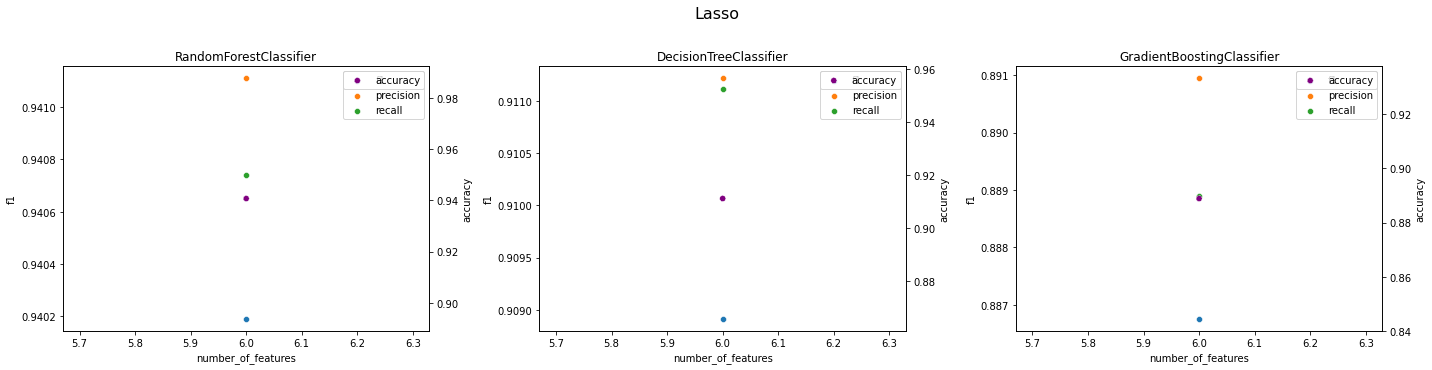

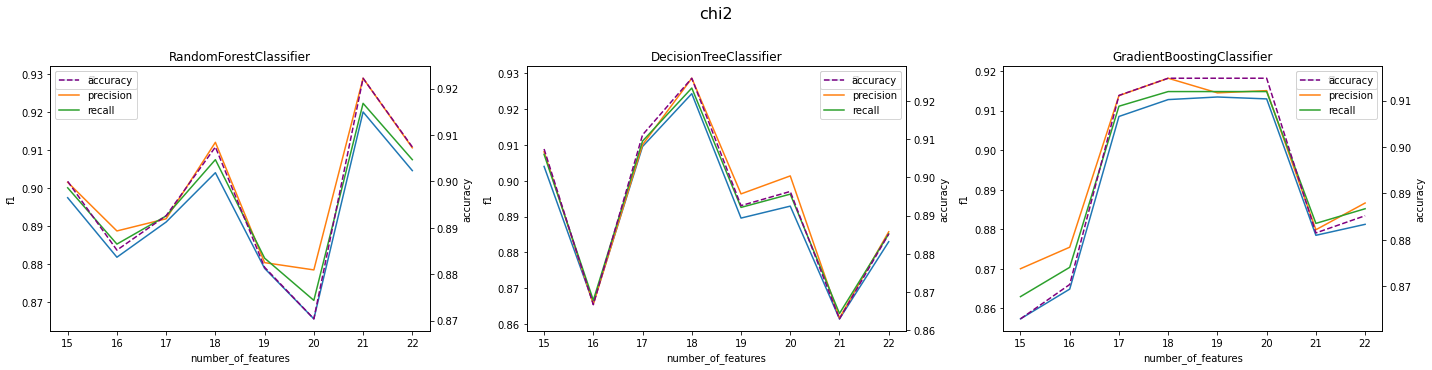

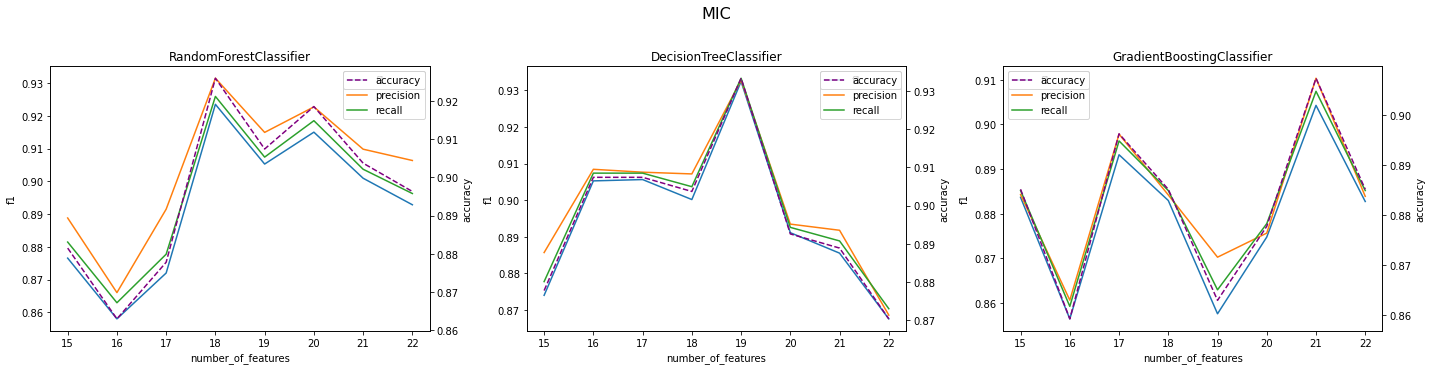

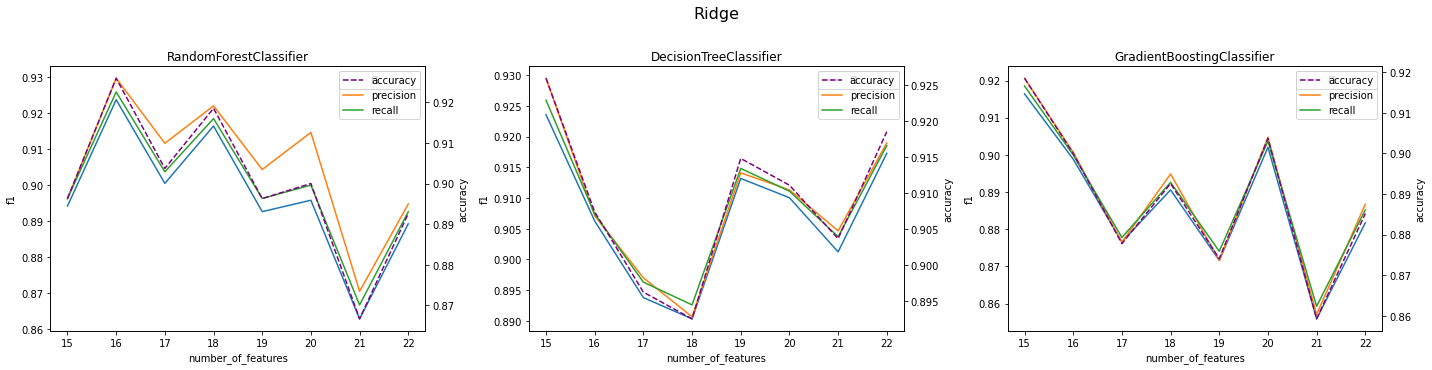

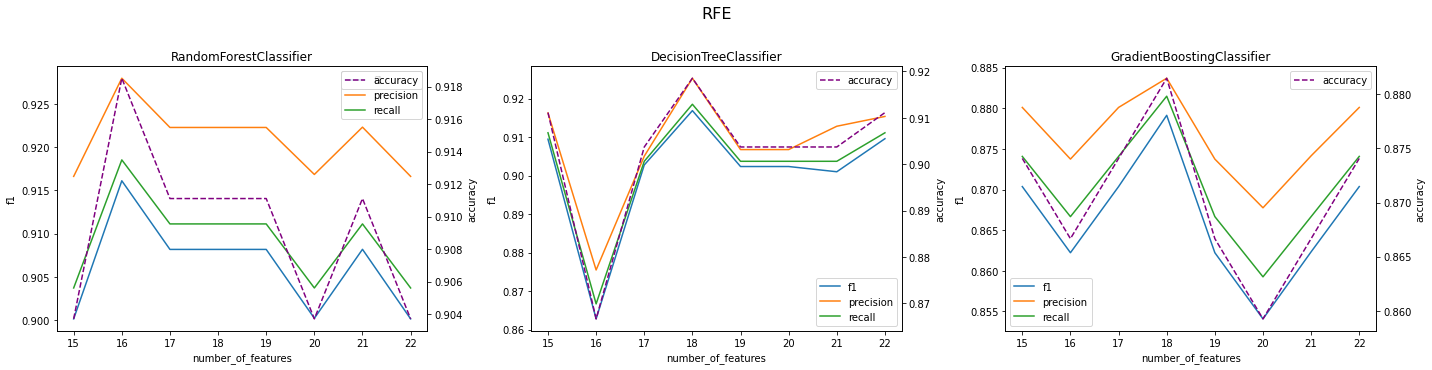

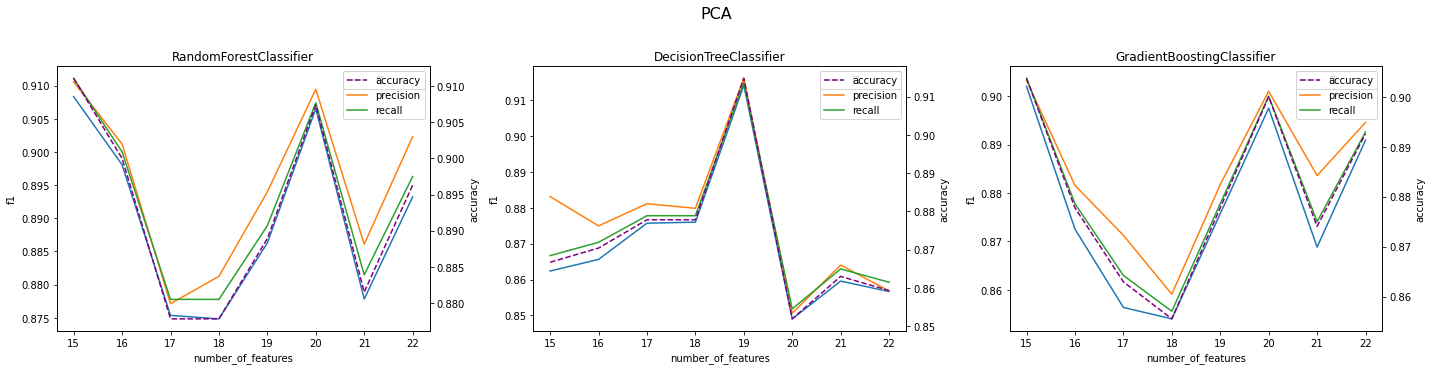

In [416]:
show_results("Lasso",plt_type=sns.scatterplot)
show_results("chi2")
show_results("MIC")
show_results("Ridge")
show_results("RFE")
show_results("PCA")

In [417]:
def calculate_best_scores():
    best_scores = {"Lasso": None, "chi2": None, "MIC": None, "Ridge": None, "RFE": None, "PCA": None, "MaxVoting": None, "Stacking": None}
    
    for i, row in score_dataframe.iterrows():
        current_best = best_scores[row["method_name"]]
        
        if current_best is None or row["accuracy"] > current_best["accuracy"]:
            best_scores[row["method_name"]] = row.to_dict()

    return best_scores

best_scores = calculate_best_scores()

In [418]:
best_scores_df = pd.DataFrame(list(best_scores.values()))
best_scores_df = best_scores_df.sort_values(by="accuracy", ascending=False)
best_scores_df.drop(["confusion_matrix", "roc_curve"], axis=1)

,method_name,model_name,accuracy,f1,recall,precision,roc_auc,number_of_features
0,Lasso,RandomForestClassifier,0.940741,0.940190,0.940741,0.941111,0.983418,6
2,MIC,DecisionTreeClassifier,0.933333,0.932453,0.933333,0.932819,0.948581,19
1,chi2,DecisionTreeClassifier,0.925926,0.924355,0.925926,0.928666,0.945452,18
3,Ridge,DecisionTreeClassifier,0.925926,0.923574,0.925926,0.929506,0.941796,15
4,RFE,RandomForestClassifier,0.918519,0.916100,0.918519,0.927963,0.977902,16
5,PCA,DecisionTreeClassifier,0.914815,0.914086,0.914815,0.916049,0.937340,19
6,MaxVoting,MaxVoting,0.896296,0.893714,0.896296,0.905227,0.964965,6
7,Stacking,Stacking,0.896296,0.894053,0.896296,0.903761,0.973742,6


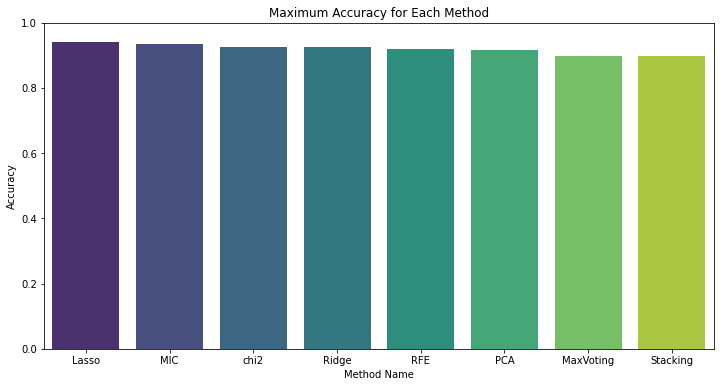

In [419]:
plt.figure(figsize=(12, 6))
sns.barplot(x='method_name', y='accuracy', data=best_scores_df, palette='viridis')
plt.title('Maximum Accuracy for Each Method')
plt.xlabel('Method Name')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

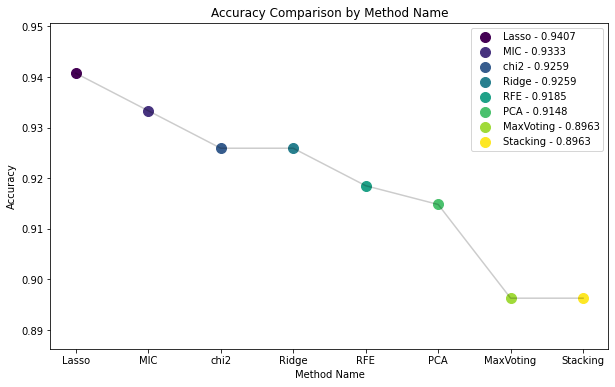

In [420]:
method_names = best_scores_df["method_name"].tolist()
accuracies = best_scores_df["accuracy"].tolist()
colors = plt.cm.viridis(np.linspace(0, 1, len(method_names)))

plt.figure(figsize=(10, 6))
for i, (method, accuracy, color) in enumerate(zip(method_names, accuracies, colors)):
    plt.scatter(method, accuracy, color=color, label=f"{method} - {accuracy:.4f}",s=100)

plt.plot(method_names, accuracies, linestyle="-", color="black", alpha=0.2) 
plt.xlabel("Method Name")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison by Method Name")
plt.ylim([accuracies[-1]-0.01, accuracies[0]+0.01])
plt.legend()
plt.show()

<h3>Confusion matrix</h3>

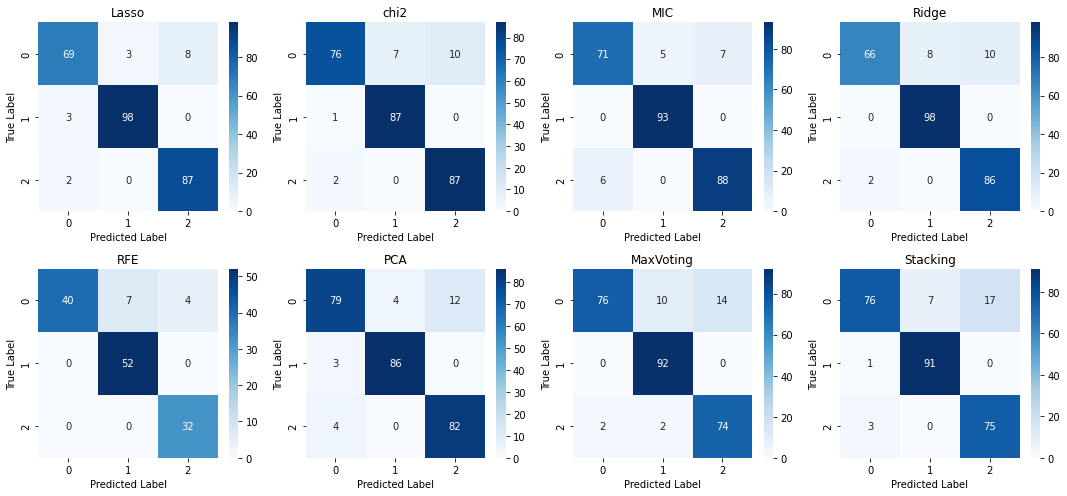

In [421]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7))
axes = axes.flatten()
for i in range(len(best_scores_df)):
    sns.heatmap(best_scores_df["confusion_matrix"][i], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(best_scores_df['method_name'][i])
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
plt.tight_layout()

<h3>ROC curve</h3>

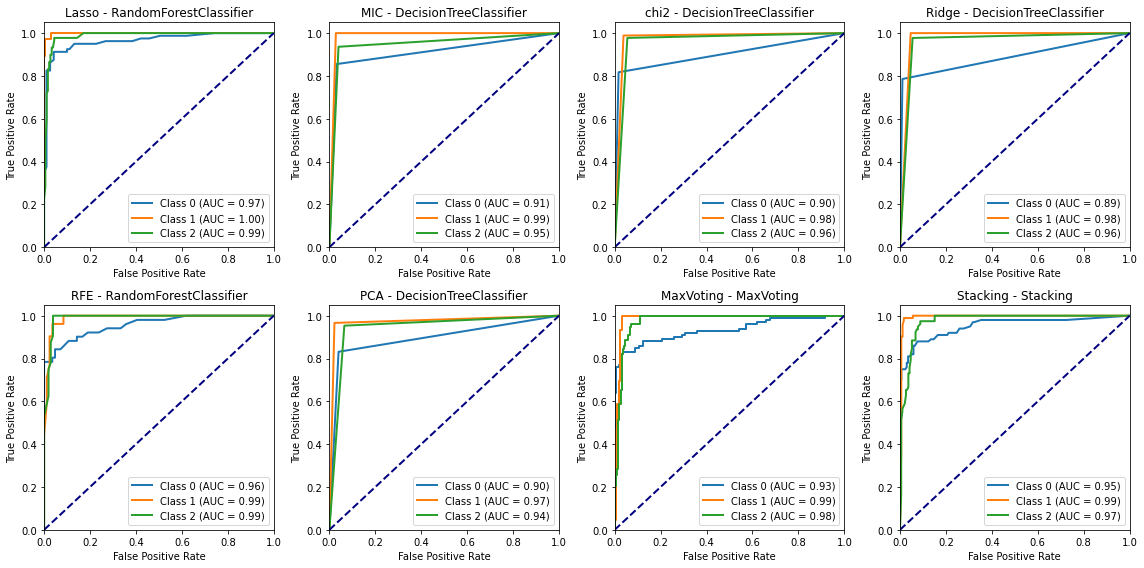

In [422]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for index, (i, row) in enumerate(best_scores_df.iterrows()):
    fpr = row["roc_curve"][0]
    tpr = row["roc_curve"][1]
    roc_auc = row["roc_curve"][2]

    row_index = index // 4
    col_index = index % 4
    
    for j in range(3):
        axes[row_index, col_index].plot(fpr[j], tpr[j], lw=2, label=f'Class {j} (AUC = {roc_auc[j]:.2f})')

    axes[row_index, col_index].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[row_index, col_index].set_xlim([0.0, 1.0])
    axes[row_index, col_index].set_ylim([0.0, 1.05])
    axes[row_index, col_index].set_xlabel('False Positive Rate')
    axes[row_index, col_index].set_ylabel('True Positive Rate')
    axes[row_index, col_index].set_title(f'{row["method_name"]} - {row["model_name"]}')
    axes[row_index, col_index].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [427]:
X = data.drop("Credit_Score", axis=1)
y = data["Credit_Score"]

def calculate_score_with_outliers(model):
    if method_name == "chi2" or method_name == "MIC":
        selected = call_best_method[method_name](number_of_features,X=min_max_scale(X),y=y)
    else:
        selected = call_best_method[method_name](number_of_features,X=X,y=y)


    if type(selected) == tuple:
        X_train, X_test, y_train, y_test = selected
    else:
        X_train, X_test, y_train, y_test = train_test_split(selected, y, test_size= 0.2, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

outlier_score = calculate_score_with_outliers(RandomForestClassifier())
best_accuracy = best_scores_df.iloc[0]["accuracy"]

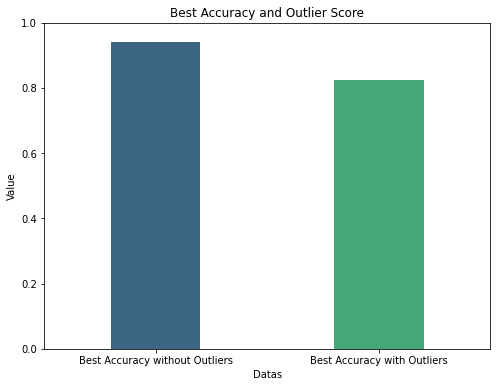

In [432]:
data = {
    'name': ['Best Accuracy without Outliers', 'Best Accuracy with Outliers'],
    'value': [best_accuracy, outlier_score]
}

df_metrics = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
colors = sns.color_palette("viridis", len(df_metrics['name']))
sns.barplot(x='name', y='value', data=df_metrics, palette=colors,width=0.4)
plt.title('Best Accuracy and Outlier Score')
plt.ylabel('Value')
plt.xlabel('Datas')
plt.ylim(0, 1)
plt.show()